In [48]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df_train = pd.read_parquet('train_dataset_hackaton2023_train.gzip')
df_test = pd.read_parquet('hackaton2023_test.gzip')

In [70]:
df_test

,customer_id,group_name,revenue,startdatetime,dish_name,ownareaall_sqm,format_name
1773606,13220760,test,0.28,2022-12-22 13:09:11,"Липтон Лимон в бутылке 0,5л",174.40,Фудкорт с туалетом
4035564,30315975,test,139.99,2023-03-05 16:45:05,Пиво Балтика 7 0.5л розлив,235.00,Отдельно стоящий
2507770,21679985,test,36.00,2022-12-13 16:10:55,Кинг Фри мал,165.00,Фудкорт без туалета
3963775,29754274,test,230.00,2023-03-14 14:10:43,Цезарь ролл со стрипсами,150.00,Фудкорт без туалета
859943,7797823,test,204.96,2022-10-22 14:09:28,Up Гранд Чиз Фреш,114.50,Фудкорт без туалета
...,...,...,...,...,...,...,...
1677742,12727388,test,99.99,2023-04-29 10:12:21,Сырные Медальоны (6 шт.),92.00,Фудкорт без туалета
4450230,36332632,test,79.98,2023-02-12 19:57:23,"Липтон Грин Дж 0,3",216.93,Отдельно стоящий без внешней зоны
3882998,29278039,test,209.99,2022-11-08 15:39:53,Воппер Ролл,300.00,Отдельно стоящий с внешней зоной
1356999,11223378,test,679.98,2023-01-31 19:15:39,Двойной Воппер с сыром,136.50,Фудкорт без туалета


In [32]:
df_train.head()

,customer_id,date_diff_post,buy_post,group_name,revenue,startdatetime,dish_name,ownareaall_sqm,format_name
0,29891,9.0,1,train,69.99,2022-12-05 12:03:58,Кинг Фри станд,300.0,Отдельно стоящий без внешней зоны
1,29891,9.0,1,train,190.00,2022-12-05 12:03:58,Чикен Тар-Тар,300.0,Отдельно стоящий без внешней зоны
2,29891,9.0,1,train,9.99,2022-12-05 12:03:58,Соус Сырный,300.0,Отдельно стоящий без внешней зоны
3,29891,9.0,1,train,119.99,2022-12-05 12:03:58,Энергет.нап. Адреналин Раш,300.0,Отдельно стоящий без внешней зоны
4,29891,9.0,1,train,119.99,2022-12-05 14:28:35,Латте (СТАНД.),300.0,Отдельно стоящий без внешней зоны


In [33]:
# customers in train and test are different
len(df_train.merge(df_test, on='customer_id'))

0

In [34]:
# train time range
df_train['startdatetime'].min(), df_train['startdatetime'].max()

(Timestamp('2022-09-02 00:00:39'), Timestamp('2023-08-01 23:57:46'))

In [35]:
# test time range
df_test['startdatetime'].min(), df_test['startdatetime'].max()

(Timestamp('2022-09-02 00:04:00'), Timestamp('2023-08-01 23:31:03'))

In [36]:
# na train 
df_train.isna().sum()

customer_id             0
date_diff_post    2468517
buy_post                0
group_name              0
revenue                 0
startdatetime           0
dish_name               0
ownareaall_sqm          0
format_name             0
dtype: int64

In [37]:
# na test 
df_test.isna().sum()

customer_id       0
group_name        0
revenue           0
startdatetime     0
dish_name         0
ownareaall_sqm    0
format_name       0
dtype: int64

In [38]:
# number of unique customers
df_train['customer_id'].nunique()

500000

In [39]:
df_train['group_name'].value_counts()

train    12129384
Name: group_name, dtype: int64

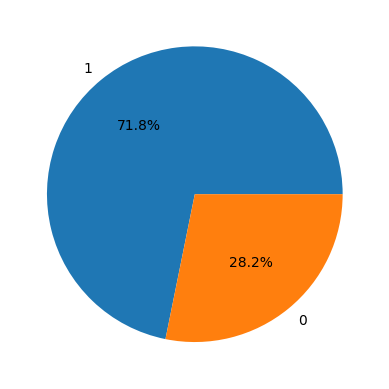

In [40]:
# target balance
retention_count = df_train.groupby('customer_id').agg('first')['buy_post'].value_counts()

fig, ax = plt.subplots()
ax.pie(retention_count, labels=retention_count.index, autopct='%1.1f%%');

<Axes: >

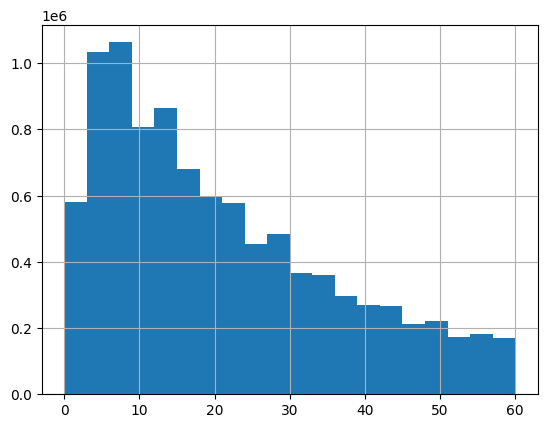

In [45]:
df_train['date_diff_post'].hist(bins=20)

<Axes: >

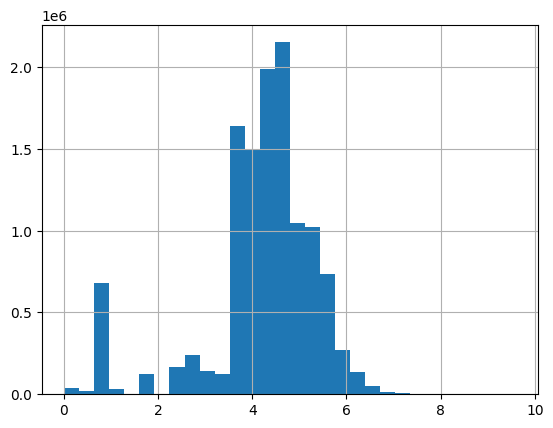

In [74]:
np.log1p(df_train['revenue']).hist(bins=30)

In [52]:
df_train['dish_name'].value_counts()

Кинг Фри мал                                  680496
Наггетсы (3 шт.)                              639692
Кинг Фри станд                                461873
Соус Сырный                                   434150
Кинг Фри бол                                  367213
                                               ...  
Пепси Макс XL 1л                                   1
Up МИКС МАСТЕР «Перчик Чили» Деревенский L         1
Воппер Джуниор Сыр-Бекон new                       1
Up Острые Стрипсы 6 Шт                             1
Т3.1RUB.АНГУС Шеф new                              1
Name: dish_name, Length: 1038, dtype: int64

In [77]:
df_train['dish_name'].value_counts().to_csv('dish_name.csv')

<Axes: >

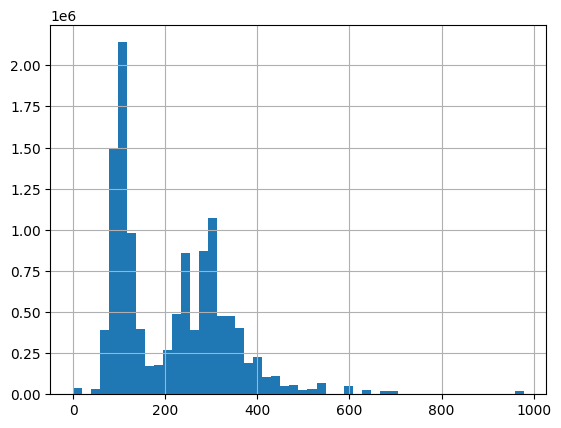

In [78]:
df_train['ownareaall_sqm'].hist(bins=50)

In [65]:
df_train['format_name'].value_counts()

Фудкорт без туалета                              4648951
Отдельно стоящий с внешней зоной                 2310987
Отдельно стоящий без внешней зоны                1814429
Отдельно стоящий                                 1663806
Фудкорт с туалетом                               1166460
Отдельно стоящий без внешней зоны без туалета     268701
Отдельно стоящий без туалета                      164444
Отдельно стоящий с внешн.зоной без туалета         91576
Не заполнено                                          30
Name: format_name, dtype: int64